# Analysis of the Colorado Forest Cover Data

## Background and Goals:
* Data source is obtained from the UCI-ML Data Repository here: https://archive.ics.uci.edu/ml/datasets/covertype or from Kaggle here: https://www.kaggle.com/uciml/forest-cover-type-dataset
* Original Paper is found here: https://www.fs.fed.us/rm/ogden/research/publications/downloads/journals/1999_compag_blackard.pdf
    - Author looks at discriminant analysis and neural networks to predict the type of forest cover. This makes a good opportunity to practice fitting neural networks in Python with Keras since there is a bench-mark for comparison. 
    - Author only consider a single layer NN, so it might be interesting to consider different network architecture, due to additional computing resources we have today.
    
* Some questions to consider:
    - Does a different (more complicated) NN architecture generate a better model?
    - Does a NN model outperform other statistical learning methods?
    - Can we examine which factors effect forest cover type?
    - Can we perform dimension reduction on the soil factors?
    - Can we apply a different modeling technique to gain a better interpretation of the model/data?

## Data Structure and Exploratory Analysis

* Let's examine qualitative features of the data (or one's that I might find interesting)
* Let's look at a few plots of the data.
    - How do the different features depend on location, e.g. wilderness area? Do different wilderness areas have particular defining characteristics?
    - Question: do we really need all those soil types/features?
    
First the libraries and load the `.csv` of the data:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

forest = pd.read_csv('covtype.csv', sep = ',')
forest.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


Number of occurrences of a forest cover type in each wilderness area (see paper for details about each wilderness area):

In [2]:
## Select areas and cover type variables
wa_long = forest[['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Cover_Type']]

## Make cover categorical
wa_long['Cover_Type'] = wa_long['Cover_Type'].astype("category")
wa_long = wa_long.groupby(by = ['Cover_Type']).sum()

wa_long

<ipython-input-2-13cf91fe7a79>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wa_long['Cover_Type'] = wa_long['Cover_Type'].astype("category")


,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
Cover_Type,,,,
1,105717,18595,87528,0
2,146197,8985,125093,3026
3,0,0,14300,21454
4,0,0,0,2747
5,3781,0,5712,0
6,0,0,7626,9741
7,5101,2304,13105,0


Bar-Plots of the total number of coverage types in each wilderness area:

<AxesSubplot:xlabel='Cover_Type'>

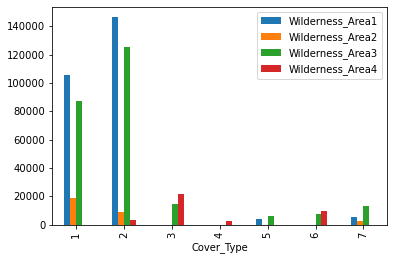

In [10]:
wa_long.plot(kind = 'bar')

Both the table and plot indicate Cover Type 2 the the most prevalent followed by Type 1. Different wilderness areas have different amounts and proportions of cover types -although areas 1 and 2 are somewhat similar. The total number of observations among wilderness areas and among cover types is very unbalanced. Let's look at how the other features depend on the particular wilderness area:

In [11]:
## List of continuous variables
cont_vars = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 
             'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon','Hillshade_3pm',
             'Horizontal_Distance_To_Fire_Points', 'Cover_Type']

## List of wilderness areas
wild_vars = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']

## Copy and make cover type categorical
forest_long = forest
forest_long['Cover_Type'] = forest_long['Cover_Type'].astype("category")

## Make column of wilderness areas
wild_col = forest[wild_vars].idxmax(1)

## Glue it to the forest data
forest_long['Area'] = wild_col

forest_long.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Area
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,5,Wilderness_Area1
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,5,Wilderness_Area1
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,2,Wilderness_Area1
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,2,Wilderness_Area1
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,5,Wilderness_Area1


### Distributions of the topographic variables:

Let's examine the distribution of the continuous topographic variables, e.g. elevation, aspect, and distances, across the different wilderness areas and the different forest cover types. Some questions to consider:

* Do certain wilderness areas have unique/defining features of their topography, e.g. are there important spatial features we can glean? 
* Similarly, do certain cover types exist in a particular type or combination of topographic features?
* Are there any observations that suggest the imbalance of the data across levels of cover types be an issue for modeling?

#### Elevation

Text(0.5, 1.0, 'Elevation by Cover Type')

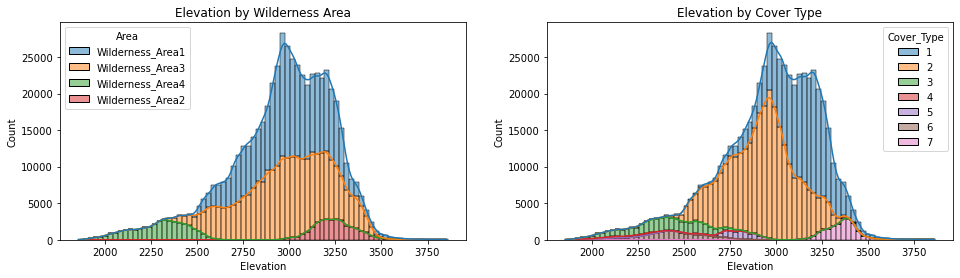

In [12]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16, 4, forward = True)

sns.histplot(forest_long, x = "Elevation", bins = 75, 
             hue = "Area", multiple = "stack", kde = True, ax = ax[0]).set_title("Elevation by Wilderness Area")
sns.histplot(forest_long, x = "Elevation", bins = 75,
             hue = "Cover_Type", multiple = "stack", kde = True, ax = ax[1]).set_title("Elevation by Cover Type")

All four wilderness areas have different elevation distributions and similarly certain cover types tend to grow in different elevations more readily. Wilderness areas 4 and 2 have very different elevation distributions, and 1 and 3 are somewhat similar. Again, notice due to the unbalance of the data, some cover types are hardly visible in the plot. There appears to be a dependence on cover type by elevation.    

#### Aspect and Slope

Text(0.5, 1.0, 'Slope by Cover Type')

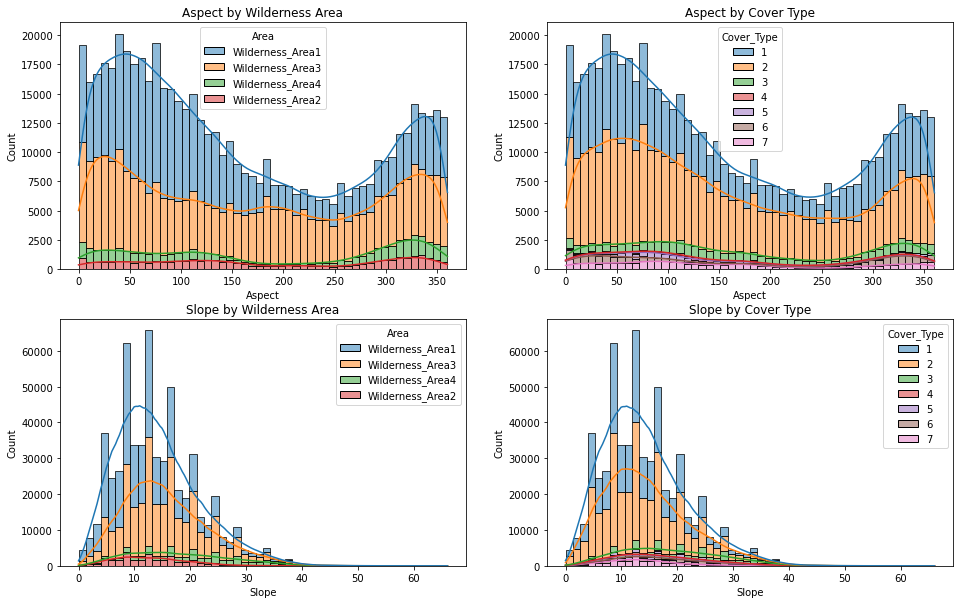

In [13]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(16, 10, forward = True)

sns.histplot(forest_long, x = "Aspect", bins = 50, 
             hue = "Area", multiple = "stack", kde = True, ax = ax[0,0]).set_title("Aspect by Wilderness Area")
sns.histplot(forest_long, x = "Aspect", bins = 50,
             hue = "Cover_Type", multiple = "stack", kde = True, ax = ax[0,1]).set_title("Aspect by Cover Type")

sns.histplot(forest_long, x = "Slope", bins = 50, 
             hue = "Area", multiple = "stack", kde = True, ax = ax[1,0]).set_title("Slope by Wilderness Area")
sns.histplot(forest_long, x = "Slope", bins = 50,
             hue = "Cover_Type", multiple = "stack", kde = True, ax = ax[1,1]).set_title("Slope by Cover Type")

Similar aspects and slopes are present among the different wilderness areas and the different cover types. The terrain tends to me more north north-east or south facing, and less east/west facing. The slopes are similar among wilderness areas and among cover types; no slopes seem to be greater than 40 degrees.

#### Hydrology distances:

Text(0.5, 1.0, 'Vert. Dist. Hydro. by Cover Type')

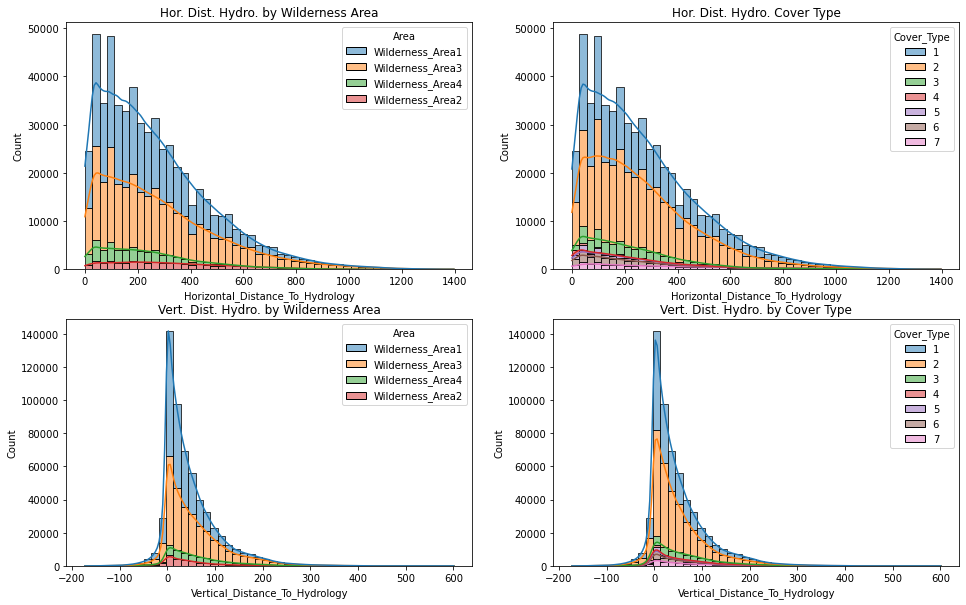

In [14]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(16, 10, forward = True)

sns.histplot(forest_long, x = "Horizontal_Distance_To_Hydrology", bins = 50, 
             hue = "Area", multiple = "stack", kde = True, ax = ax[0,0]).set_title("Hor. Dist. Hydro. by Wilderness Area")
sns.histplot(forest_long, x = "Horizontal_Distance_To_Hydrology", bins = 50,
             hue = "Cover_Type", multiple = "stack", kde = True, ax = ax[0,1]).set_title("Hor. Dist. Hydro. Cover Type")

sns.histplot(forest_long, x = "Vertical_Distance_To_Hydrology", bins = 50, 
             hue = "Area", multiple = "stack", kde = True, ax = ax[1,0]).set_title("Vert. Dist. Hydro. by Wilderness Area")
sns.histplot(forest_long, x = "Vertical_Distance_To_Hydrology", bins = 50,
             hue = "Cover_Type", multiple = "stack", kde = True, ax = ax[1,1]).set_title("Vert. Dist. Hydro. by Cover Type")

Again, the features are fairly similar. One subtle observation is the vertical and horizontal distances to hydrology tend to have the similar right-tails in the distribution in each wilderness area, whereas the hydrologic distances have different tales among the different cover types. This indicates similar hydrologic features among wilderness areas, but different cover types have different water requirements. 

#### Distances to roadways and most recent fire position:

Text(0.5, 1.0, 'Dist. to Fire by Cover Type')

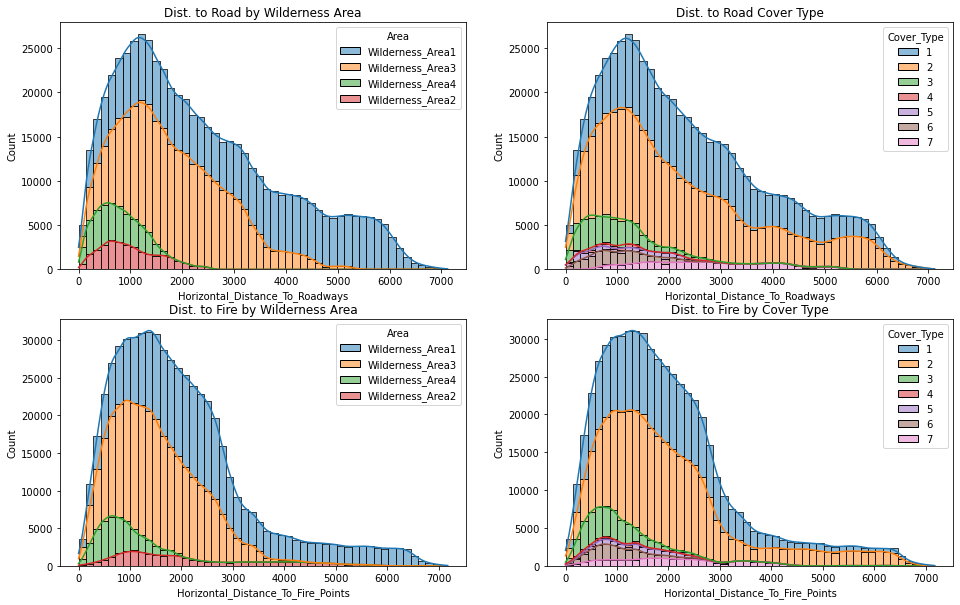

In [15]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(16, 10, forward = True)

sns.histplot(forest_long, x = "Horizontal_Distance_To_Roadways", bins = 50, 
             hue = "Area", multiple = "stack", kde = True, ax = ax[0,0]).set_title("Dist. to Road by Wilderness Area")
sns.histplot(forest_long, x = "Horizontal_Distance_To_Roadways", bins = 50,
             hue = "Cover_Type", multiple = "stack", kde = True, ax = ax[0,1]).set_title("Dist. to Road Cover Type")

sns.histplot(forest_long, x = "Horizontal_Distance_To_Fire_Points", bins = 50, 
             hue = "Area", multiple = "stack", kde = True, ax = ax[1,0]).set_title("Dist. to Fire by Wilderness Area")
sns.histplot(forest_long, x = "Horizontal_Distance_To_Fire_Points", bins = 50,
             hue = "Cover_Type", multiple = "stack", kde = True, ax = ax[1,1]).set_title("Dist. to Fire by Cover Type")

Once again, similar features among the different wilderness areas and different cover types. Wilderness area 1 is very heavy tailed for both distances, and similarly cover types 1 and 2 have heavy tailed distances from the closest fire.

### Hillshade characteristics:

Text(0.5, 1.0, 'Afternoon Shade Fire by Cover Type')

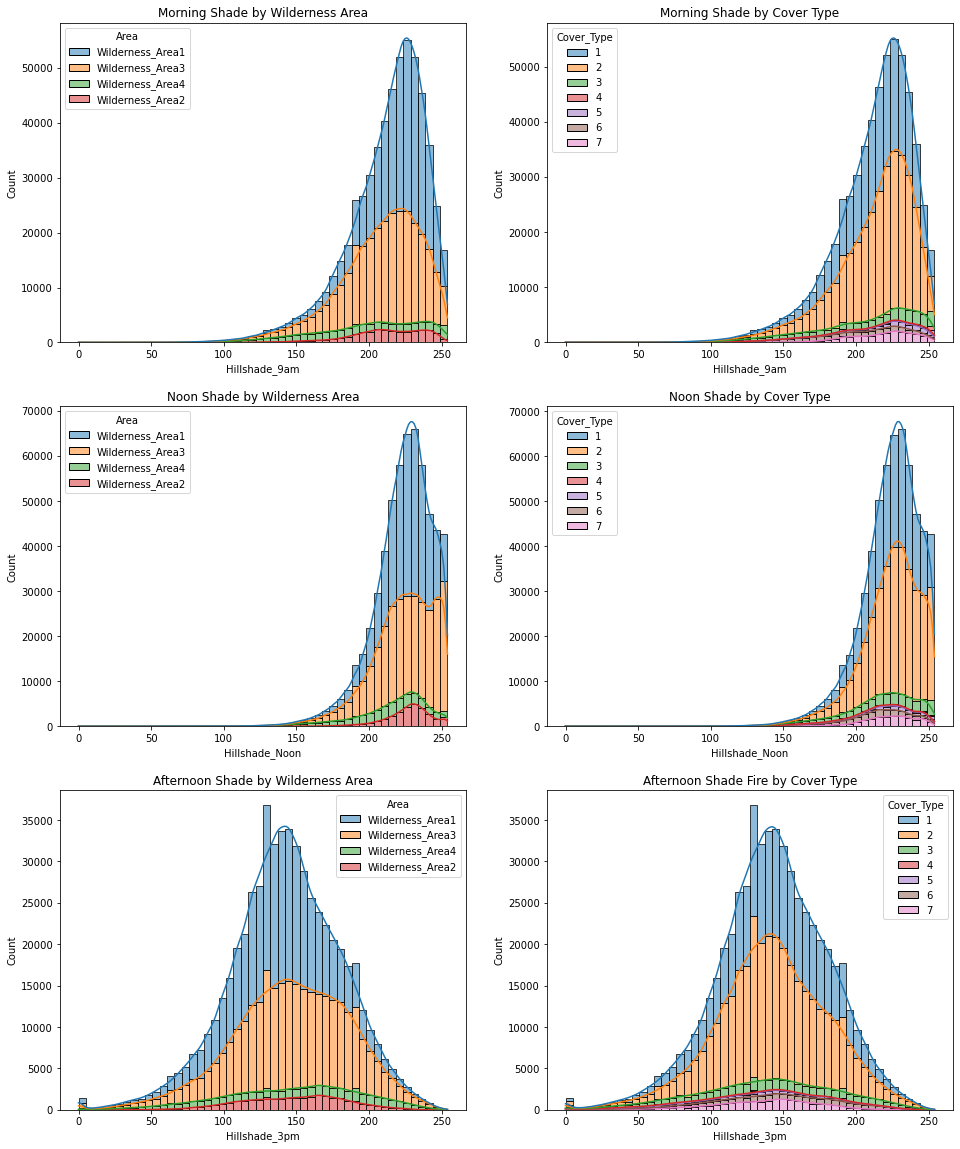

In [16]:
fig, ax = plt.subplots(3,2)
fig.set_size_inches(16, 20, forward = True)

sns.histplot(forest_long, x = "Hillshade_9am", bins = 50, 
             hue = "Area", multiple = "stack", kde = True, ax = ax[0,0]).set_title("Morning Shade by Wilderness Area")
sns.histplot(forest_long, x = "Hillshade_9am", bins = 50,
             hue = "Cover_Type", multiple = "stack", kde = True, ax = ax[0,1]).set_title("Morning Shade by Cover Type")

sns.histplot(forest_long, x = "Hillshade_Noon", bins = 50, 
             hue = "Area", multiple = "stack", kde = True, ax = ax[1,0]).set_title("Noon Shade by Wilderness Area")
sns.histplot(forest_long, x = "Hillshade_Noon", bins = 50,
             hue = "Cover_Type", multiple = "stack", kde = True, ax = ax[1,1]).set_title("Noon Shade by Cover Type")

sns.histplot(forest_long, x = "Hillshade_3pm", bins = 50, 
             hue = "Area", multiple = "stack", kde = True, ax = ax[2,0]).set_title("Afternoon Shade by Wilderness Area")
sns.histplot(forest_long, x = "Hillshade_3pm", bins = 50,
             hue = "Cover_Type", multiple = "stack", kde = True, ax = ax[2,1]).set_title("Afternoon Shade Fire by Cover Type")

Hill shade is the least present in the afternoon, but in the morning there is more variation than compared to noon. We see a similar behavior across the different cover types. There may be an interesting interaction between the shade amount, slope, and aspect for the different coverage types, e.g. a steep north facing slope will generally have more shade which may impact the cover type that grows in such a location. 

### Potentially Interesting Scatter plots

The histograms show some interesting behavior for each variable on its own, however certain pairs of variables my by interesting. Although it would be impractical to consider all pairwise plots (while it could be done, they would be hard to interpret due to over plotting) let's consider a few pairs of variables with coloring for the wilderness areas and the cover types to see if any patterns emerge.

#### Elevation vs. Horizontal Distance to Roadways

Text(0.5, 1.0, 'Distance to Road by Elevation for Cover Type')

C:\Users\jddru\Anaconda3\envs\STAA578\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


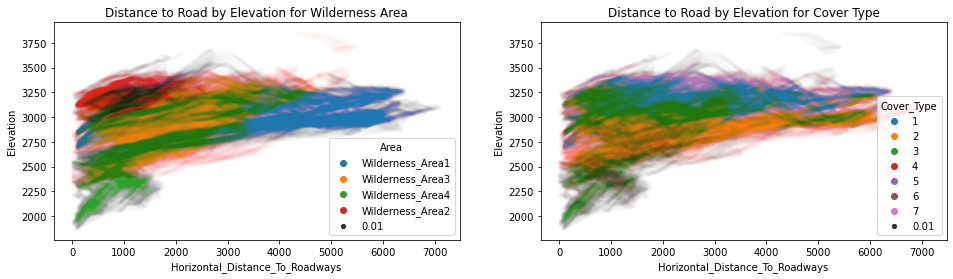

In [17]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16, 4, forward = True)

sns.scatterplot(data = forest_long, 
                x = "Horizontal_Distance_To_Roadways", y = "Elevation", 
                alpha = 0.005, size = 0.01, hue = "Area", 
                ax = ax[0]).set_title("Distance to Road by Elevation for Wilderness Area") 
sns.scatterplot(data = forest_long, 
                x = "Horizontal_Distance_To_Roadways", y = "Elevation", 
                alpha = 0.005, size = 0.01, hue = "Cover_Type", 
                ax = ax[1]).set_title("Distance to Road by Elevation for Cover Type")

It would be reasonable to assume these variable are correlated in some way since higher elevation locations ought to be further away from roads. The plot above show the preferred elevation strata for coverage type and the elevation distributions for the different wilderness areas. There is some degree of relationship between the elevation and distance to road-ways. 

#### Elevation vs. Slope

Text(0.5, 1.0, 'Slope by Elevation for Cover Type')

C:\Users\jddru\Anaconda3\envs\STAA578\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


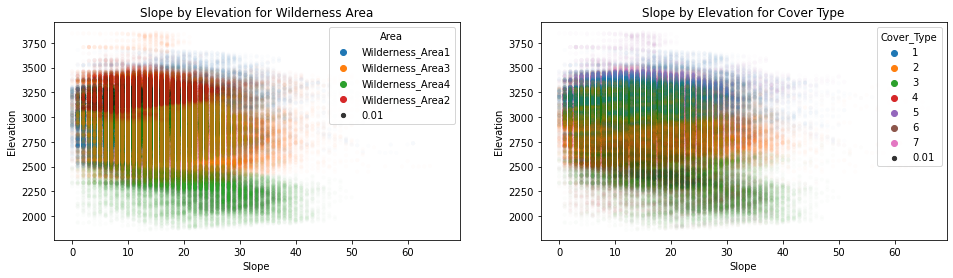

In [18]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16, 4, forward = True)

sns.scatterplot(data = forest_long, 
                x = "Slope", y = "Elevation", 
                alpha = 0.01, size = 0.01, hue = "Area", 
                ax = ax[0]).set_title("Slope by Elevation for Wilderness Area") 
sns.scatterplot(data = forest_long, 
                x = "Slope", y = "Elevation", 
                alpha = 0.01, size = 0.01, hue = "Cover_Type", 
                ax = ax[1]).set_title("Slope by Elevation for Cover Type")

Nothing particularly new is observed here -just the elevation and cover type dependence. Elevation does not have an impact on the slope of trees (when the mountains get really steep there aren't any trees growing, just rocks!)

#### Horizontal Distance to Hydrology vs. Horizontal Distance to Roadways

Text(0.5, 1.0, 'Distance to Hydrology by Elevation for Cover Type')

C:\Users\jddru\Anaconda3\envs\STAA578\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


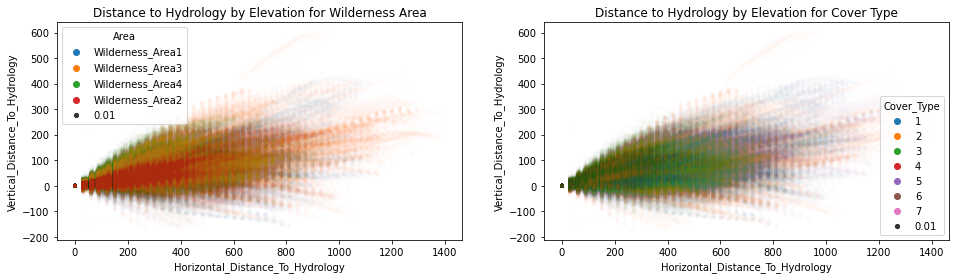

In [19]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16, 4, forward = True)

sns.scatterplot(data = forest_long, 
                x = "Horizontal_Distance_To_Hydrology", y = "Vertical_Distance_To_Hydrology", 
                alpha = 0.01, size = 0.01, hue = "Area", 
                ax = ax[0]).set_title("Distance to Hydrology by Elevation for Wilderness Area") 
sns.scatterplot(data = forest_long, 
                x = "Horizontal_Distance_To_Hydrology", y = "Vertical_Distance_To_Hydrology", 
                alpha = 0.01, size = 0.01, hue = "Cover_Type", 
                ax = ax[1]).set_title("Distance to Hydrology by Elevation for Cover Type")

There is a slight relationship between the vertical and horizontal hydrology distances. There is a distinct fan-feature, and it looks like different wilderness areas and cover-types have different amounts of fan shape.

#### Afternoon Shade vs. Aspect

Text(0.5, 1.0, 'Shade by Aspect for Cover Type')

C:\Users\jddru\Anaconda3\envs\STAA578\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


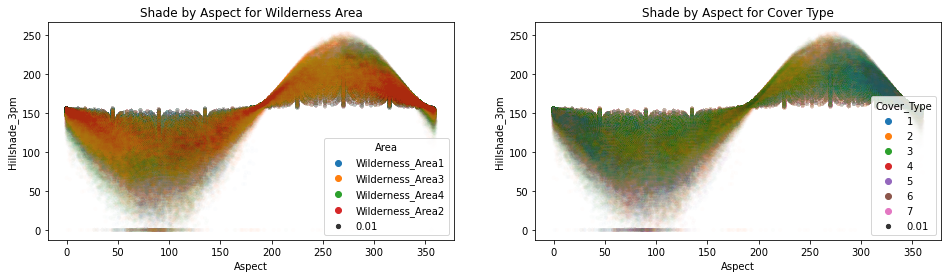

In [20]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16, 4, forward = True)

sns.scatterplot(data = forest_long, 
                x = "Aspect", y = "Hillshade_3pm", 
                alpha = 0.01, size = 0.01,
                hue = "Area", ax = ax[0]).set_title("Shade by Aspect for Wilderness Area") 
sns.scatterplot(data = forest_long, 
                x = "Aspect", y = "Hillshade_3pm", 
                alpha = 0.01, size = 0.01, 
                hue = "Cover_Type", ax = ax[1]).set_title("Shade by Aspect for Cover Type")

A pithy observation about the aspect and shade was made previously. The most notable feature of these plots are the shapes (caused by the geometry of the Sun and Earth position) and the the stratification of colors. In the wilderness area colors the red stratification is much more narrow than the others, and for the cover type the 2nd is more narrow as well. There is a cluster of observations that receives almost no shade!

### Examination of the Soil Modifiers

Lets examine the behavior of the soil modifiers among the different wilderness areas and different coverage types. Some items to consider:

* Are all the soil modifier types (40 of them) necessary?
* Would it be reasonable to group some of the soil types together?

In [21]:
## Subet the soil columns and convert cover type to categorical
forest_soil = forest.loc[:, 'Wilderness_Area1':'Cover_Type']
forest_soil['Cover_Type'] = forest_soil['Cover_Type'].astype("category")

## Get the soil columns
soil_cols = forest_soil.columns[4:-1]
wilderness_cols = forest_soil.columns[0:4]

## Un-one-hot encode the soil columns and wilderness columns
forest_soil['Soil_Types'] = forest_soil[soil_cols].idxmax(1)
forest_soil['Wilderness_Area'] = forest_soil[wilderness_cols].idxmax(1)

## drop soil type one-hot columns
forest_soil = forest_soil.drop(soil_cols, axis = 1)
forest_soil = forest_soil.drop(wilderness_cols, axis = 1)

forest_soil.head()

,Cover_Type,Soil_Types,Wilderness_Area
0,5,Soil_Type29,Wilderness_Area1
1,5,Soil_Type29,Wilderness_Area1
2,2,Soil_Type12,Wilderness_Area1
3,2,Soil_Type30,Wilderness_Area1
4,5,Soil_Type29,Wilderness_Area1


Text(0.5, 1.0, 'Distribution of Soil Types')

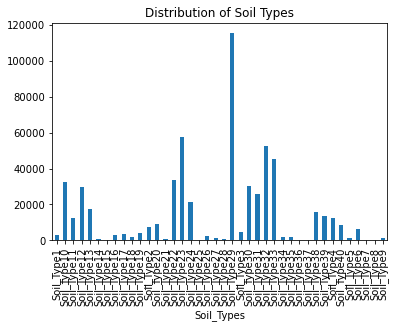

In [22]:
soil_xtab = pd.crosstab(forest_soil['Soil_Types'], 'Soil_Types')
soil_xtab.plot.bar(stacked = True).get_legend().remove()
plt.title("Distribution of Soil Types")

Soil type 29 is the most abundant in the data. Some have very low counts. Let's examine the top 20 soil types:

In [23]:
pd.crosstab(forest_soil['Soil_Types'], 'Soil_Types').unstack().sort_values(ascending = False).head(20)

col_0       Soil_Types 
Soil_Types  Soil_Type29    115247
            Soil_Type23     57752
            Soil_Type32     52519
            Soil_Type33     45154
            Soil_Type22     33373
            Soil_Type10     32634
            Soil_Type30     30170
            Soil_Type12     29971
            Soil_Type31     25666
            Soil_Type24     21278
            Soil_Type13     17431
            Soil_Type38     15573
            Soil_Type39     13806
            Soil_Type11     12410
            Soil_Type4      12396
            Soil_Type20      9259
            Soil_Type40      8750
            Soil_Type2       7525
            Soil_Type6       6575
            Soil_Type3       4823
dtype: int64

It may be useful to consider the top 10 or 20 soil types in the data. Let's look at the soil types dis-aggregated by the cover type and the wilderness area:

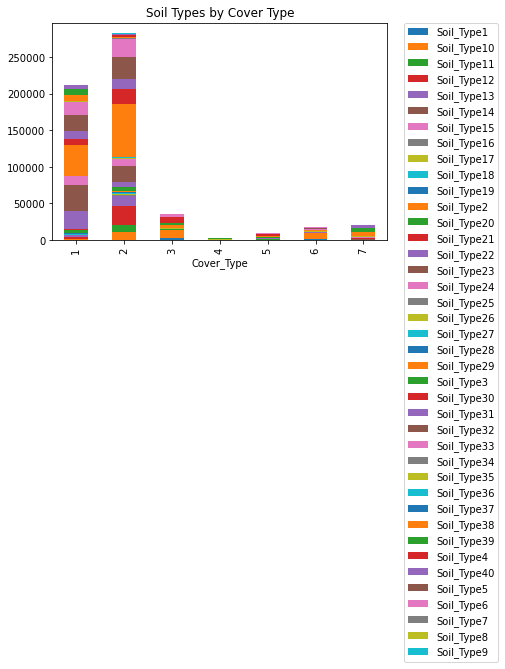

In [24]:
soilct_xtab = pd.crosstab(forest_soil['Cover_Type'], [forest_soil['Soil_Types']])
soilct_xtab.plot.bar(stacked = True)
plt.title("Soil Types by Cover Type")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Cover types 1 and 2 seem to have similar soil compositions. 4, 5, 6, and 7 appear to have different compositions from 1 and 2 and from each other.

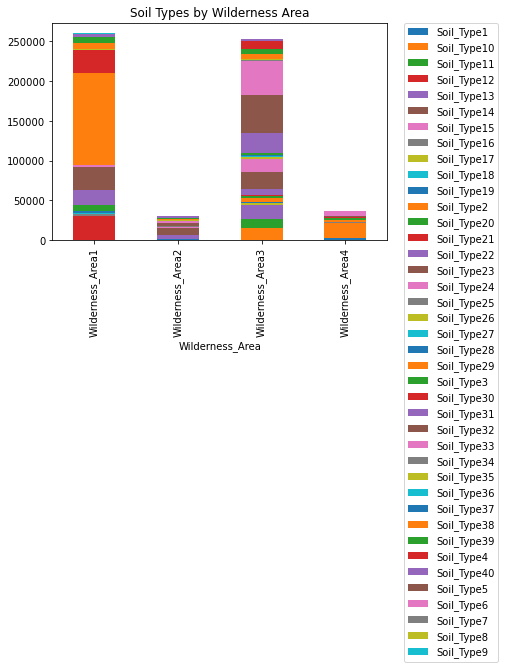

In [25]:
soilwa_xtab = pd.crosstab(forest_soil['Wilderness_Area'], [forest_soil['Soil_Types']])
soilwa_xtab.plot.bar(stacked = True)
plt.title("Soil Types by Wilderness Area")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Each wilderness area appears to have a distinct soil composition. Areas 1 and 3 seem very different from each other. Note that cover types 3,4,5,6 are not present (or in large amounts) in wilderness area 1, but are in wilderness area 3. It seems reasonable to posit that this may be due to the soil types. 

#### Clustering Soil

It may be interesting to cluster by cover type and soil type (e.g. see how the spatial distribution of forest cover changes based on the soil modifiers). A correspondence analysis may be more appropriate here, but the intent is just to get an idea of how the soil variables are related to the cover type!

In [3]:
## select spatial variables
forest_spatial = forest.loc[:,'Soil_Type1':'Cover_Type']

## one-hot code the cover_type variable
cover_dummy = pd.get_dummies(forest_spatial.Cover_Type, prefix = 'Cover')
forest_spatial = pd.concat([forest_spatial, cover_dummy], axis = 1)
forest_spatial.drop(columns = ['Cover_Type'], axis = 1, inplace = True)

forest_spatial.head()

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,...,Soil_Type38,Soil_Type39,Soil_Type40,Cover_1,Cover_2,Cover_3,Cover_4,Cover_5,Cover_6,Cover_7
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Let's find the optimum number of clusters based on the 'Elbow Method' e.g. where we see a significant change in slope when we plot the within-cluster-sum-of-squared-errors and the number of clusters. (other methods could be applied, but clustering isn't the main objective --for now).

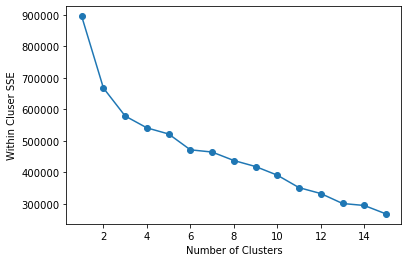

In [4]:
from sklearn.cluster import KMeans

elbows = []
n_clusters = 15

for i in range(1, n_clusters + 1):
    km = KMeans(n_clusters = i, init = 'random', n_init = 10, max_iter = 500, random_state = 123)
    km.fit(forest_spatial)
    elbows.append(km.inertia_)
    
## plot the values
plt.plot(range(1, n_clusters + 1), elbows, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluser SSE')
plt.show()

We get an elbow roughly around 4 or 5. Since there are 7 cover types it may be interesting to examine the clustering with 7. The within cluster SSE is generally quit high anyway. Now, let's visualize the clusters along the first two principal components: 

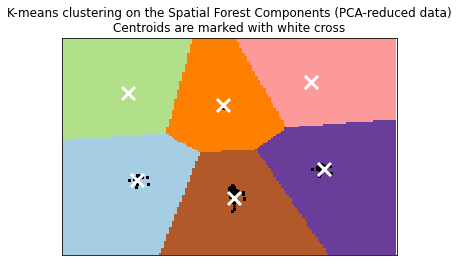

In [8]:
from sklearn.decomposition import PCA

spatial_pca = PCA(n_components = 2).fit_transform(forest_spatial)
spatial_kmeans = KMeans(n_clusters = 6, init = 'random', n_init = 10, max_iter = 500, random_state = 123)
spatial_kmeans.fit(spatial_pca)

## taken from the sklearn documentation example

## step size of mesh
h = 0.02

## decision boundary
x_min, x_max = spatial_pca[:,0].min() - 0.5, spatial_pca[:, 0].max() + 0.5
y_min, y_max = spatial_pca[:,1].min() - 0.5, spatial_pca[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh.
Z = spatial_kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(spatial_pca[:, 0], spatial_pca[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = spatial_kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the Spatial Forest Components (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

After playing around with the number of clusters, 6 seems to partition the PCA space along the first two components reasonably well. The plot above shows the different regions and where the clusters lie. This possibly indicates that two of the forest cover types are located on similar soils or the cover type drives the clustering. Again, a different method ought to be applied for a more through analysis, but this provides some flavor as to how cover type is related to soil composition.

#### Remarks about Soil

* A model with and with out the soil types ought to be considered and see how performance metrics change, e.g. a sensitivity analysis.
* Would it be useful to to combine/aggregate the soil data into a more simple measure?
* Given the observations of the soil types by wilderness area bar chart, will including the wilderness area act as a proxy for the overall soil modification? 

## Implementing the Blacard and Jean Neural Network

Blackard and Jean found a neural network with 54 input variables, 120 hidden nodes, and 7 output nodes with the ADAM optimizer with default parameters. Let's use this a as a starting point for a neural network architecture and a sensitivity analysis.

In [3]:
import tensorflow as tf
import keras
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

## Load in data again after munging
forest = pd.read_csv('covtype.csv', sep = ',')

## Select features
forest_features = forest.iloc[:,0:-1]

## Re-scale continuous vars
scaler = StandardScaler()
forest_features = scaler.fit_transform(forest_features)

## Select targes and convert to categorical:
forest_targets = to_categorical(forest.iloc[:,-1])

For simplicity, a the data will be split into an 80% testing and 20% validation set (Blackard and Jean apply a slightly more complicated method where the training data contains balanced target classes.)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(forest_features, forest_targets, 
                                                    test_size = 0.2, random_state = 52)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(464809, 54)
(464809, 8)
(116203, 54)
(116203, 8)


Let's fit the model:

In [5]:
## Define the model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(120, activation='relu', input_shape = (X_train.shape[1],)))
model.add(layers.Dense(y_train.shape[1], activation='softmax'))

## Comple the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
## Fit the model
history = model.fit(X_train, y_train, epochs=25, batch_size=128, validation_split = 0.2)

Epoch 1/25
2906/2906 [==============================] - 3s 979us/step - loss: 0.6153 - accuracy: 0.7415 - val_loss: 0.5523 - val_accuracy: 0.7644
Epoch 2/25
2906/2906 [==============================] - 3s 946us/step - loss: 0.5262 - accuracy: 0.7733 - val_loss: 0.5083 - val_accuracy: 0.7802
Epoch 3/25
2906/2906 [==============================] - 3s 994us/step - loss: 0.4933 - accuracy: 0.7872 - val_loss: 0.4873 - val_accuracy: 0.7919
Epoch 4/25
2906/2906 [==============================] - 3s 1ms/step - loss: 0.4727 - accuracy: 0.7969 - val_loss: 0.4649 - val_accuracy: 0.7987
Epoch 5/25
2906/2906 [==============================] - 3s 1ms/step - loss: 0.4572 - accuracy: 0.8044 - val_loss: 0.4611 - val_accuracy: 0.8023
Epoch 6/25
2906/2906 [==============================] - 3s 1ms/step - loss: 0.4449 - accuracy: 0.8108 - val_loss: 0.4404 - val_accuracy: 0.8112
Epoch 7/25
2906/2906 [==============================] - 3s 936us/step - loss: 0.4351 - accuracy: 0.8155 - val_loss: 0.4356 - val_a

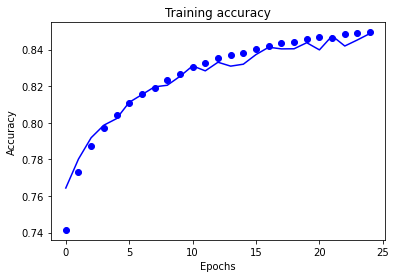

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'bo', label = 'Training Acc')
plt.plot(history.history['val_accuracy'], 'b', label = 'Validation Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy")
plt.show()

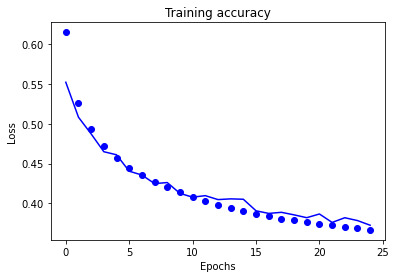

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'bo', label = 'Training Acc')
plt.plot(history.history['val_loss'], 'b', label = 'Validation Acc')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training accuracy")
plt.show()

Training the model for 3-6 epochs seems to be sufficient (and avoids over-fitting the data). The resulting training accuracy and validation accuracy is around 81-82%. For fun, lets try a slightly more complicated NN-structure:

In [9]:
## Slightly more complicated model
model2 = models.Sequential()
model2.add(layers.Dense(128, activation='relu', input_shape = (X_train.shape[1],)))
model2.add(layers.Dense(64))
model2.add(layers.Dense(64))
model2.add(layers.Dense(64))
model2.add(layers.Dense(16))
model2.add(layers.Dense(y_train.shape[1], activation='softmax'))

## Comple the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
## Fit the model
history = model2.fit(X_train, y_train, epochs=20, batch_size=128, validation_split = 0.2)

Epoch 1/20
2906/2906 [==============================] - 4s 2ms/step - loss: 0.6000 - accuracy: 0.7448 - val_loss: 0.5527 - val_accuracy: 0.7660
Epoch 2/20
2906/2906 [==============================] - 4s 1ms/step - loss: 0.5245 - accuracy: 0.7748 - val_loss: 0.5014 - val_accuracy: 0.7854
Epoch 3/20
2906/2906 [==============================] - 4s 1ms/step - loss: 0.4900 - accuracy: 0.7912 - val_loss: 0.4748 - val_accuracy: 0.8011
Epoch 4/20
2906/2906 [==============================] - 4s 1ms/step - loss: 0.4680 - accuracy: 0.8030 - val_loss: 0.4710 - val_accuracy: 0.8062
Epoch 5/20
2906/2906 [==============================] - 4s 1ms/step - loss: 0.4520 - accuracy: 0.8102 - val_loss: 0.4487 - val_accuracy: 0.8120
Epoch 6/20
2906/2906 [==============================] - 4s 1ms/step - loss: 0.4385 - accuracy: 0.8172 - val_loss: 0.4458 - val_accuracy: 0.8115
Epoch 7/20
2906/2906 [==============================] - 4s 1ms/step - loss: 0.4268 - accuracy: 0.8219 - val_loss: 0.4144 - val_accuracy:

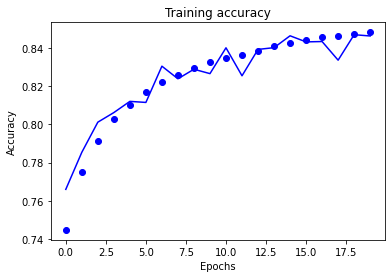

In [11]:
plt.plot(history.history['accuracy'], 'bo', label = 'Training Acc')
plt.plot(history.history['val_accuracy'], 'b', label = 'Validation Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy")
plt.show()

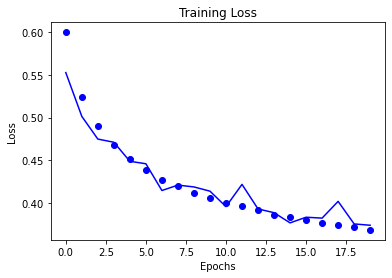

In [12]:
plt.plot(history.history['loss'], 'bo', label = 'Training Acc')
plt.plot(history.history['val_loss'], 'b', label = 'Validation Acc')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

Training this model for 10-13 epochs seems to maximize the the training and cross-validation accuracy to 83-84% or so -only a slight improvement on the single layer network. For the sensitivity analysis, let's just use the single layer network.

### Sensitivity Analysis

The sensitivity analysis will be performed by exuding one of the explanatory variables at a time. Recall there are 55 columns/variables in the data implying 54 explanatory variables. Let's remind ourselves of the the variable names:

In [17]:
forest.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

Using the `forest_features` or `X_train` array we can drop/delete a variable from the data-frame:

In [30]:
b = np.delete(X_train, 0, axis = 1)
b.shape

(464809, 53)

Now we perform the sensitivity analysis on each variable. The the number of epochs is set to 3 to avoid over-fitting the data too much. 

In [7]:
from sklearn.metrics import confusion_matrix
from keras import models
from keras import layers


sensitivity_metrics = []

for i in range(X_train.shape[1]):
    
    ## specify model
    mod = models.Sequential()
    mod.add(layers.Dense(120, activation='relu', input_shape = (X_train.shape[1]-1,)))
    mod.add(layers.Dense(y_train.shape[1], activation='softmax'))

    ## Comple the model
    mod.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    
    ## fit the model
    hist = mod.fit(np.delete(X_train, i, axis = 1), y_train, 
                   epochs=3, batch_size=128, validation_split = 0.2,
                   verbose=0)
    
    ## predict with the model
    probs = mod.predict(np.delete(X_test, i, axis = 1))
    preds = np.argmax(probs, axis = 1)
    
    ## get the test accuracy with a confusion matrix 
    cm = confusion_matrix(np.argmax(y_test, axis = 1), preds, labels = [1,2,3,4,5,6,7])
    test_acc = cm.diagonal().sum()/cm.sum()
    
    ## put the metrics into an array
    sensitivity_metrics.append([hist.history['accuracy'][-1],
                                hist.history['val_accuracy'][-1],
                                test_acc])
    
    print("Iteration #: {}".format(i))
    
    

Iteration #: 0
Iteration #: 1
Iteration #: 2
Iteration #: 3
Iteration #: 4
Iteration #: 5
Iteration #: 6
Iteration #: 7
Iteration #: 8
Iteration #: 9
Iteration #: 10
Iteration #: 11
Iteration #: 12
Iteration #: 13
Iteration #: 14
Iteration #: 15
Iteration #: 16
Iteration #: 17
Iteration #: 18
Iteration #: 19
Iteration #: 20
Iteration #: 21
Iteration #: 22
Iteration #: 23
Iteration #: 24
Iteration #: 25
Iteration #: 26
Iteration #: 27
Iteration #: 28
Iteration #: 29
Iteration #: 30
Iteration #: 31
Iteration #: 32
Iteration #: 33
Iteration #: 34
Iteration #: 35
Iteration #: 36
Iteration #: 37
Iteration #: 38
Iteration #: 39
Iteration #: 40
Iteration #: 41
Iteration #: 42
Iteration #: 43
Iteration #: 44
Iteration #: 45
Iteration #: 46
Iteration #: 47
Iteration #: 48
Iteration #: 49
Iteration #: 50
Iteration #: 51
Iteration #: 52
Iteration #: 53


Now, we can put this into a data-frame:

In [14]:
sensitivity_df = pd.DataFrame(sensitivity_metrics, columns = ['train_accuracy', 'val_accuracy', 'test_accuracy'])
sensitivity_df.insert(0,'var_name', forest.columns[:-1])
sensitivity_df

,var_name,train_accuracy,val_accuracy,test_accuracy
0,Elevation,0.728006,0.727147,0.726238
1,Aspect,0.789244,0.793980,0.795565
2,Slope,0.785323,0.791302,0.790737
3,Horizontal_Distance_To_Hydrology,0.782273,0.783051,0.783672
4,Vertical_Distance_To_Hydrology,0.784965,0.784815,0.786288
5,Horizontal_Distance_To_Roadways,0.771535,0.775898,0.776796
6,Hillshade_9am,0.786046,0.792980,0.794515
7,Hillshade_Noon,0.786119,0.786579,0.785918
8,Hillshade_3pm,0.787735,0.791431,0.794171
9,Horizontal_Distance_To_Fire_Points,0.774875,0.774284,0.774205


Generally the highest prediction accuracy on the test set reaches about 0.79-0.80. Given this the results of the sensitivity analysis suggest:

* Elevation has the most important effect on prediction accuracy (reduction in accuracy to about 0.73). This is expected given the plot in the EDA phase: we observed that different cover types are distributed about different altitudes.

* The horizontal distance to the nearest fire and horizontal distance to the nearest road have the second/third most important effect on the prediction accuracy (reduction to about 0.77). This variable seems unimportant from an intuitive point of view, but most of the roads in the region are along valley/canyon floors along rivers/streams. The closer access to water may be important for some cover types along with reducing the the effect of forest fires.

* The horizontal and vertical distance to hydrology have a marginal effect on the accuracy (reduction to 0.78). There are few soil modifiers that reduce the prediction accuracy to this level as well.